In [2]:
import re
import time
import math
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [3]:
# Load data
wine_qual = pd.read_csv('C:/Users/keith/Desktop/Thinkful/winequality-red (1).csv',encoding = "ISO-8859-1",sep='\;',header=0)

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
wine_qual.head()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Cleaning

In [5]:
# checking data types

wine_qual.dtypes

"fixed acidity"           float64
"volatile acidity"        float64
"citric acid"             float64
"residual sugar"          float64
"chlorides"               float64
"free sulfur dioxide"     float64
"total sulfur dioxide"    float64
"density"                 float64
"pH"                      float64
"sulphates"               float64
"alcohol"                 float64
"quality"                   int64
dtype: object

In [6]:
# check for null values

wine_qual.isnull().sum()

"fixed acidity"           0
"volatile acidity"        0
"citric acid"             0
"residual sugar"          0
"chlorides"               0
"free sulfur dioxide"     0
"total sulfur dioxide"    0
"density"                 0
"pH"                      0
"sulphates"               0
"alcohol"                 0
"quality"                 0
dtype: int64

In [7]:
# Make feature names easier to work with

wine_qual.columns = wine_qual.columns.str.replace(' ','_')
wine_qual.columns = wine_qual.columns.str.replace('"','')

In [8]:
wine_qual.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Exploratory data analysis

In [9]:
#Descriptive statistics

wine_qual.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


There may be a few outliers in free_sulfur_dioxide and total_sulfur_dioxide. The standard deviations are high in these features.

In [1]:
print(wine_qual.quality.value_counts())

NameError: name 'wine_qual' is not defined

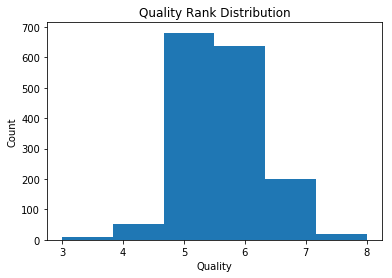

In [442]:
plt.hist(wine_qual.quality,bins=6)
plt.title("Quality Rank Distribution")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

The target variable has 6 classes. 3, 8, and 4 are very imbalanced from 5, 6, and 7 but altogether they are normally distributed. It may effect decision trees.

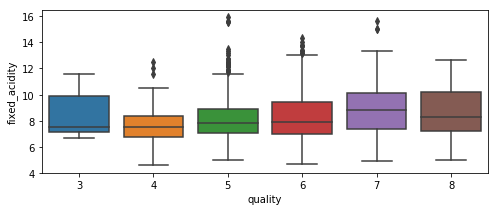

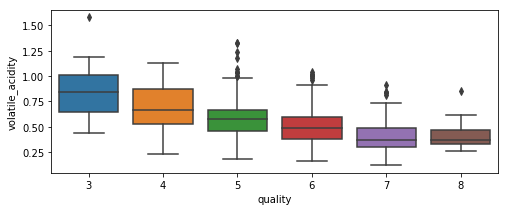

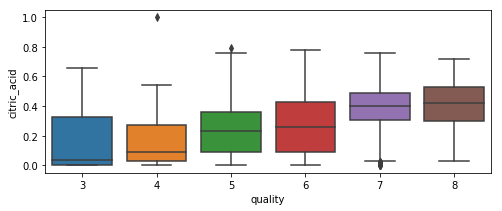

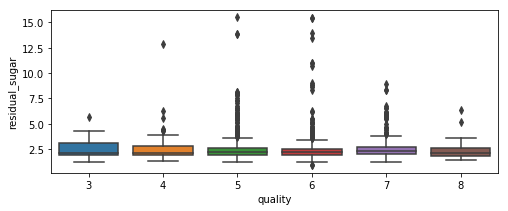

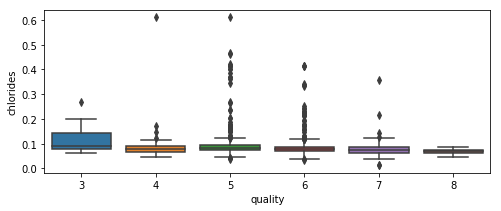

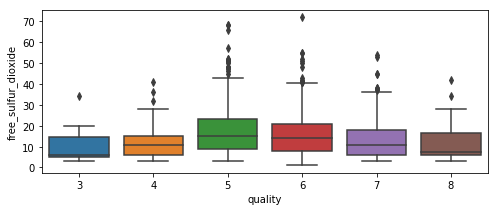

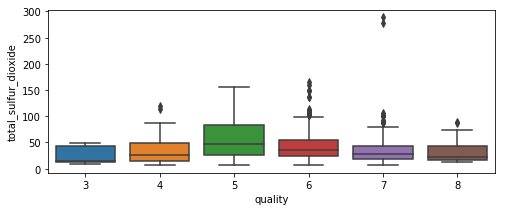

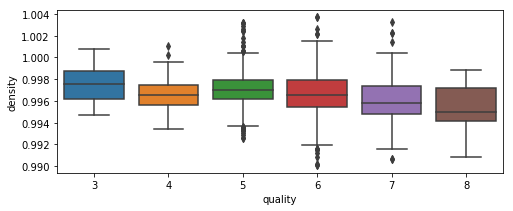

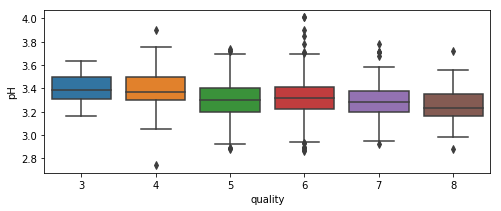

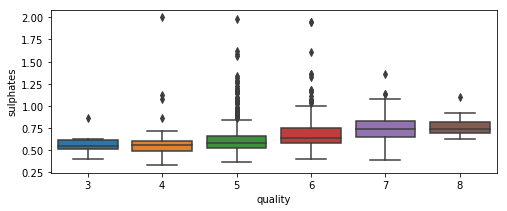

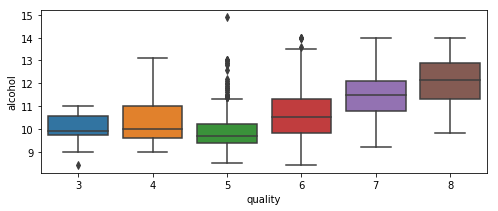

In [10]:
for i in  wine_qual.drop('quality',1):
    fig, ax = pyplot.subplots(figsize=(8, 3))
    sns.boxplot(x='quality', y= i, data=wine_qual,ax=ax)

From the boxplots it seems that higher alcohol and higher citric acid and sulfates have the greatest effect on the best wine and higher PH, density, and volatile acidity, have the greatest effect on the worst wines. The other variables seem to contribute little effect across the scale of wine quality.

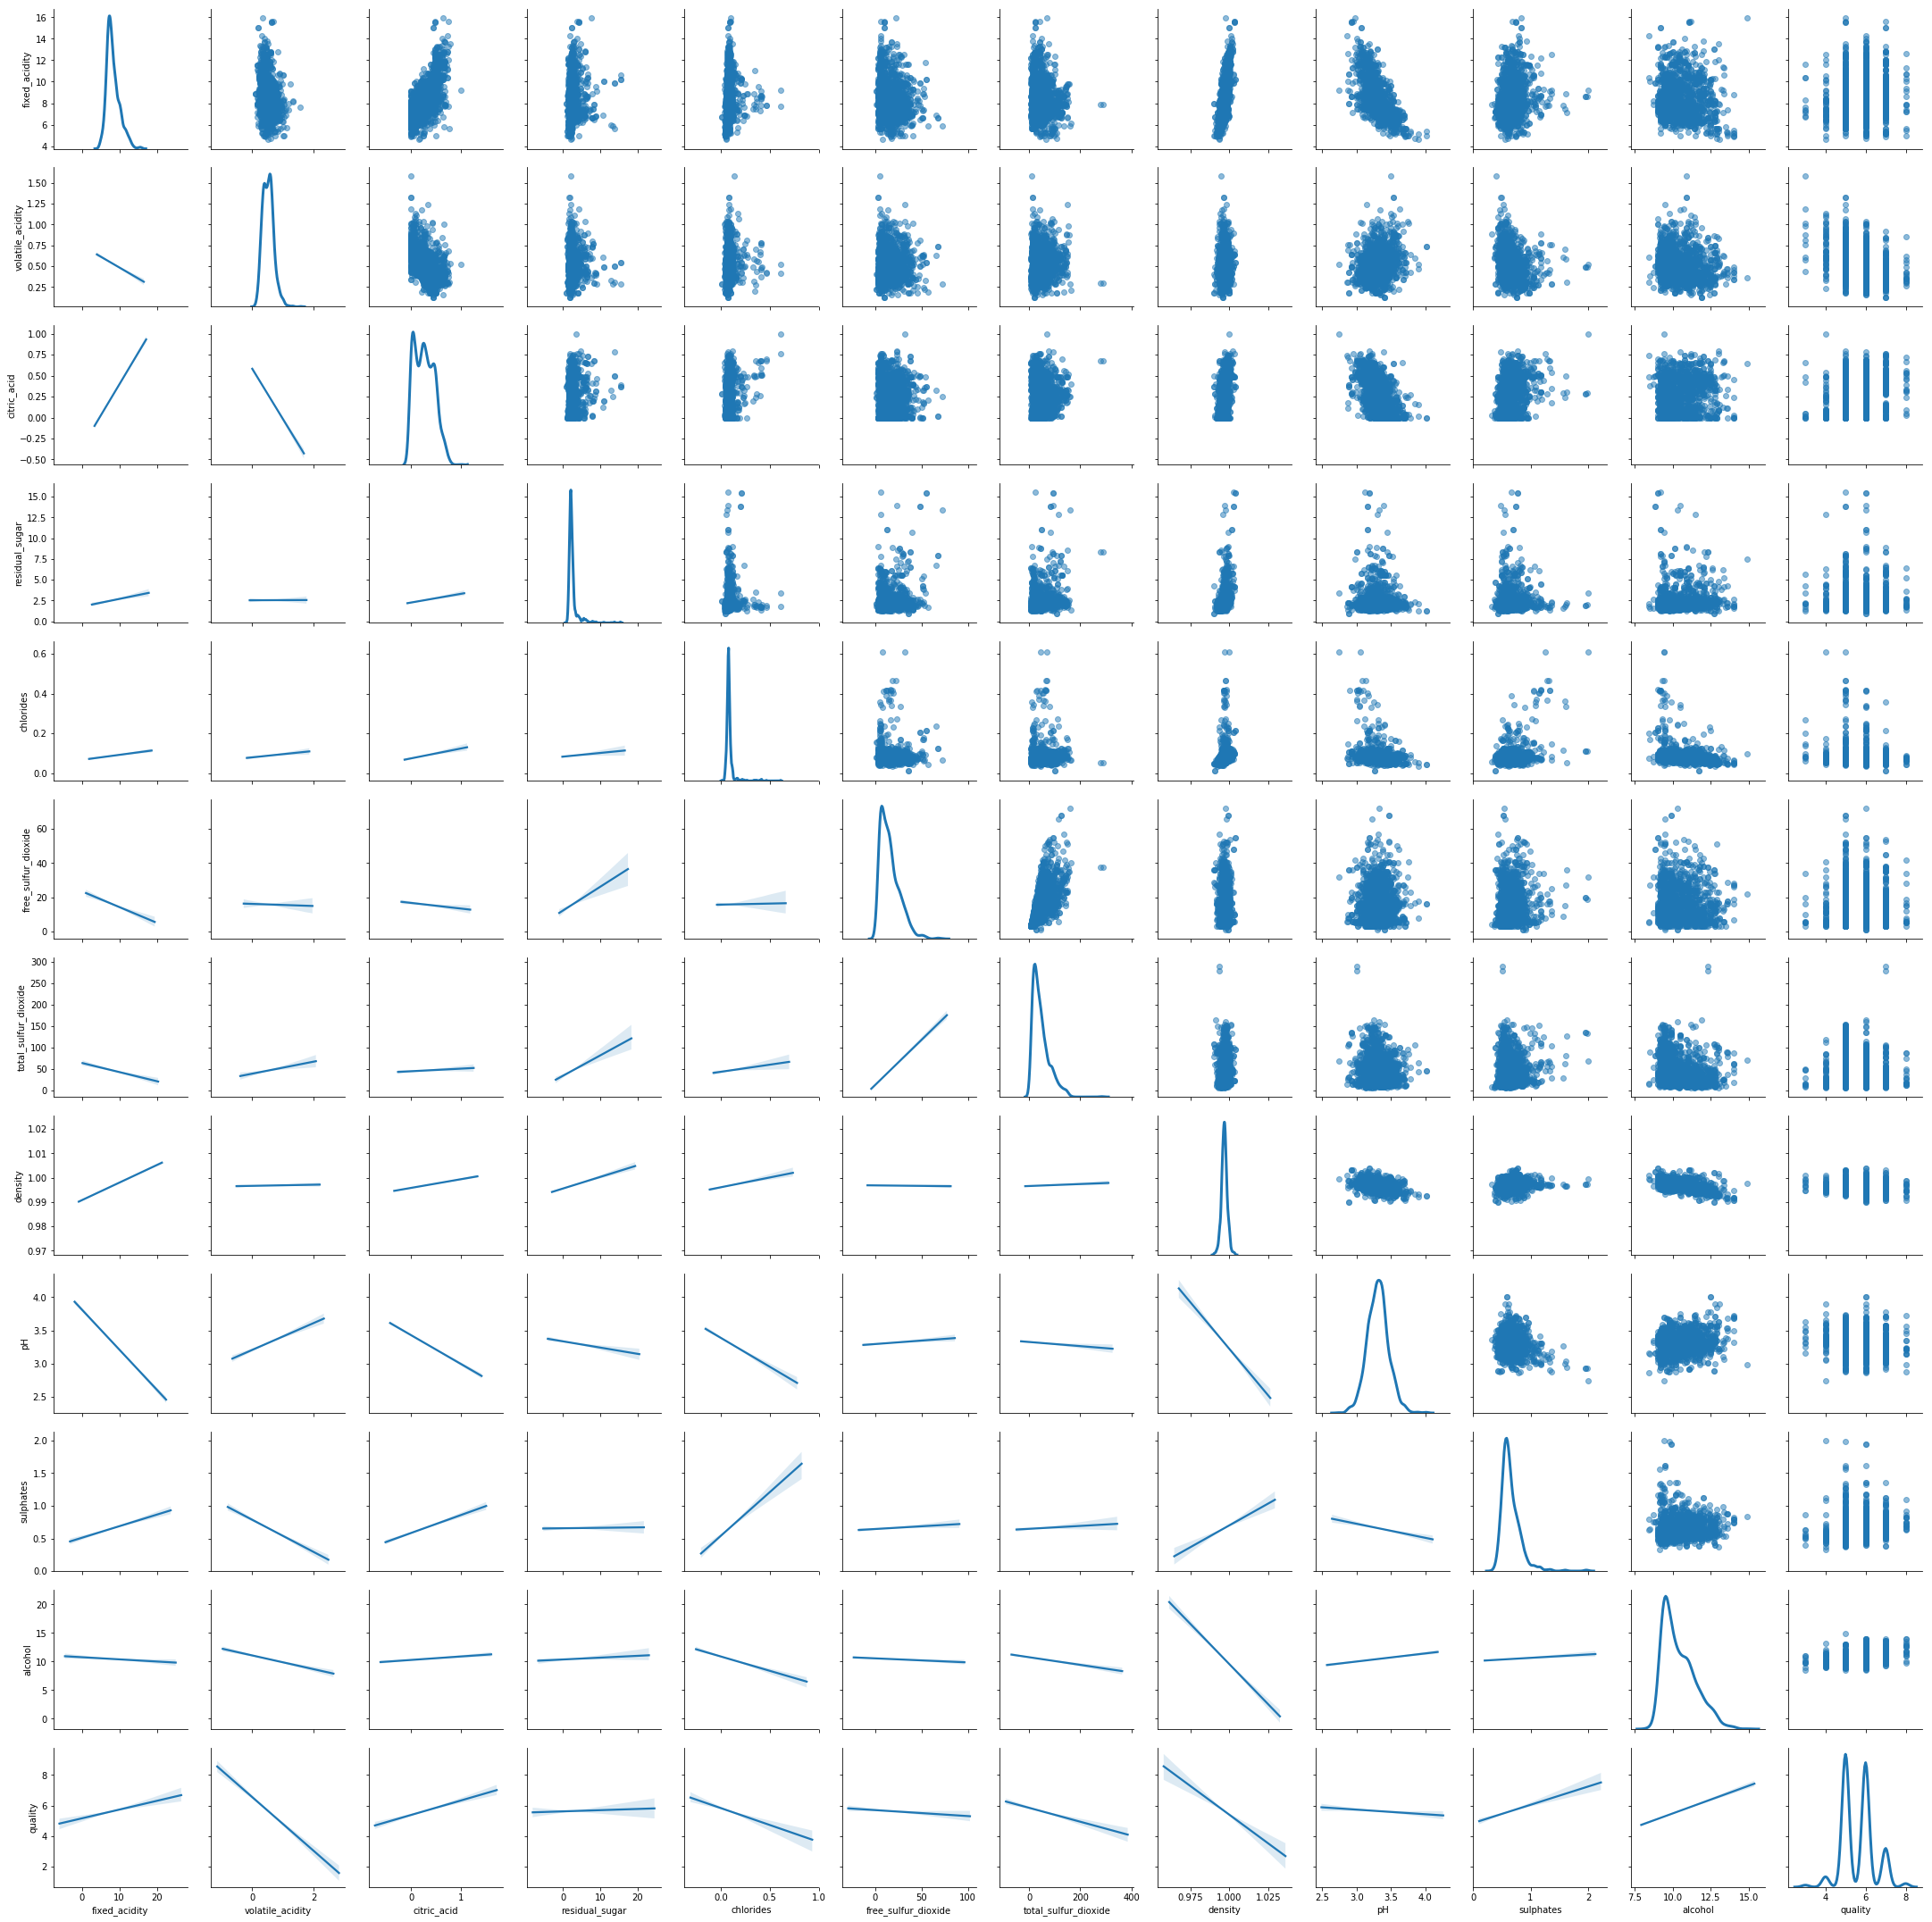

In [18]:
#pair plot 
g = sns.PairGrid(wine_qual , diag_sharey=False) 
g.map_upper(plt.scatter, alpha=.5) 
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0)) 
g.map_diag(sns.kdeplot, lw=3)
plt.show()

The pair plot confirms some of the assumptions made from the boxplots.

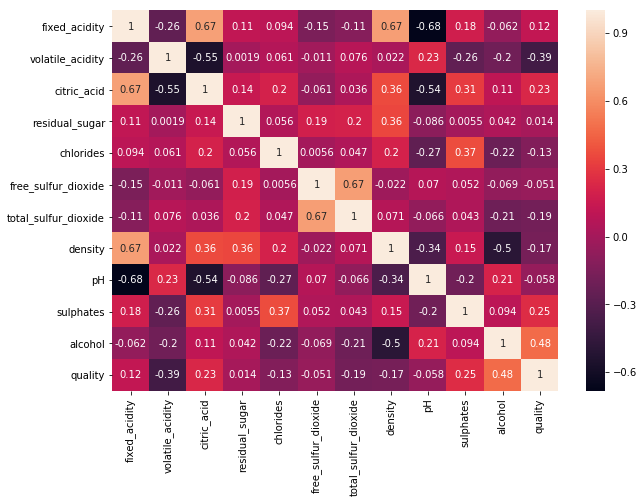

In [16]:
# Correleation Matrix

fig, ax = pyplot.subplots(figsize=(10, 7))
sns.heatmap(wine_qual.corr(),annot=True)
plt.show()

# Decision Tree


In [19]:
# Naive approach

In [20]:
X = wine_qual.drop('quality',1)
Y = wine_qual['quality']

In [21]:
start_time = time.time() # start timer 

# Initialize and train decision tree.
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features= 'sqrt',
                                            max_depth=8, random_state=20,)

decision_tree.fit(X, Y)
print(cross_val_score(decision_tree, X, Y, cv=10))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer



[0.5308642  0.47826087 0.54037267 0.48125    0.59375    0.5875
 0.5125     0.48125    0.52531646 0.50318471]

--- 0.0678708553314209 seconds ---


In [22]:
from sklearn.model_selection import train_test_split

# train_test_split to create the necessary training and test groups

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X, Y).score(X, Y))) 

With 25% Holdout: 0.57
Testing on Sample: 0.7373358348968105


In [23]:

                                        ]

In [25]:
# create new feature based on the ranges of quality to help offset the outliers.

wine_qual['log_free_sulfur_dioxide'] = [math.log(x) for x in wine_qual.free_sulfur_dioxide]
wine_qual['log_total_sulfur_dioxide'] = [math.log(x) for x in wine_qual.total_sulfur_dioxide]

In [27]:
wine_qual.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,log_free_sulfur_dioxide,log_total_sulfur_dioxide
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.397895,3.526361
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,3.218876,4.204693


In [29]:
# Try again

X = wine_qual.drop('quality',1)
Y = wine_qual['quality'] 
decision_tree.fit(X, Y)
print(cross_val_score(decision_tree, X, Y, cv=5))

[0.45652174 0.43613707 0.56074766 0.53144654 0.52996845]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X, Y).score(X, Y)))

With 25% Holdout: 0.5475
Testing on Sample: 0.7373358348968105


Poor score and overfitting

In [35]:
# Automatic feature selection with SelectKbest

import sklearn.feature_selection 
select =sklearn.feature_selection.SelectKBest()
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]
X_selected = X[colnames_selected]
print(colnames_selected)
x_train_selected = X_train[colnames_selected]
x_test_selected = X_test[colnames_selected]

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_dioxide', 'density', 'sulphates', 'alcohol', 'log_free_sulfur_dioxide', 'log_total_sulfur_dioxide']


In [36]:
decision_tree.fit(X_selected, Y)
print(cross_val_score(decision_tree, X_selected, Y, cv=10))

[0.46296296 0.44720497 0.48447205 0.54375    0.5125     0.60625
 0.50625    0.55       0.49367089 0.49681529]


In [37]:
print('With 25% Holdout: ' + str(decision_tree.fit(x_train_selected, y_train).score(x_test_selected, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X_selected, Y).score(X_selected, Y)))

With 25% Holdout: 0.58
Testing on Sample: 0.7360850531582239


Still overfitting and poor accuracy

In [38]:
# Find best parameters using GridSearchCV



param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(2,10),max_features=range(1,5))
grid = GridSearchCV(decision_tree, param_grid, cv=10, scoring="accuracy", return_train_score=True)
grid.fit(x_train_selected, y_train)

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 5), 'max_leaf_nodes': range(2, 10), 'max_features': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': 9}
0.567139282735613


In [40]:
# Update parameters
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4, max_features=4, 
                                            max_leaf_nodes=9, random_state=20)

decision_tree.fit(X_selected, Y)
print(cross_val_score(decision_tree, X_selected, Y, cv=10))

[0.49382716 0.49689441 0.60248447 0.5        0.575      0.6375
 0.5875     0.55       0.58227848 0.57324841]


In [41]:
print('With 25% Holdout: ' + str(decision_tree.fit(x_train_selected, y_train).score(x_test_selected, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(X_selected, Y).score(X_selected, Y)))


With 25% Holdout: 0.575
Testing on Sample: 0.5703564727954972


Poor score but the model doesn't seem to be overfitting.

In [44]:
# plot confusion matrix 
y_pred = decision_tree.predict(x_test_selected)
confusion_matrix(y_test,y_pred) 

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,   6,   4,   0,   0],
       [  0,   0, 122,  48,   0,   0],
       [  0,   0,  50, 115,   0,   0],
       [  0,   0,   3,  48,   0,   0],
       [  0,   0,   0,   2,   0,   0]], dtype=int64)

In [45]:
The model seems to be biased toward the majority classes.

SyntaxError: invalid syntax (<ipython-input-45-45f878596756>, line 1)

In [46]:
# Classification report

from sklearn.metrics import classification_report

target_names = ['3','4','5','6','7','8']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.67      0.72      0.69       170
           6       0.53      0.70      0.60       165
           7       0.00      0.00      0.00        51
           8       0.00      0.00      0.00         2

   micro avg       0.59      0.59      0.59       400
   macro avg       0.20      0.24      0.22       400
weighted avg       0.50      0.59      0.54       400



c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


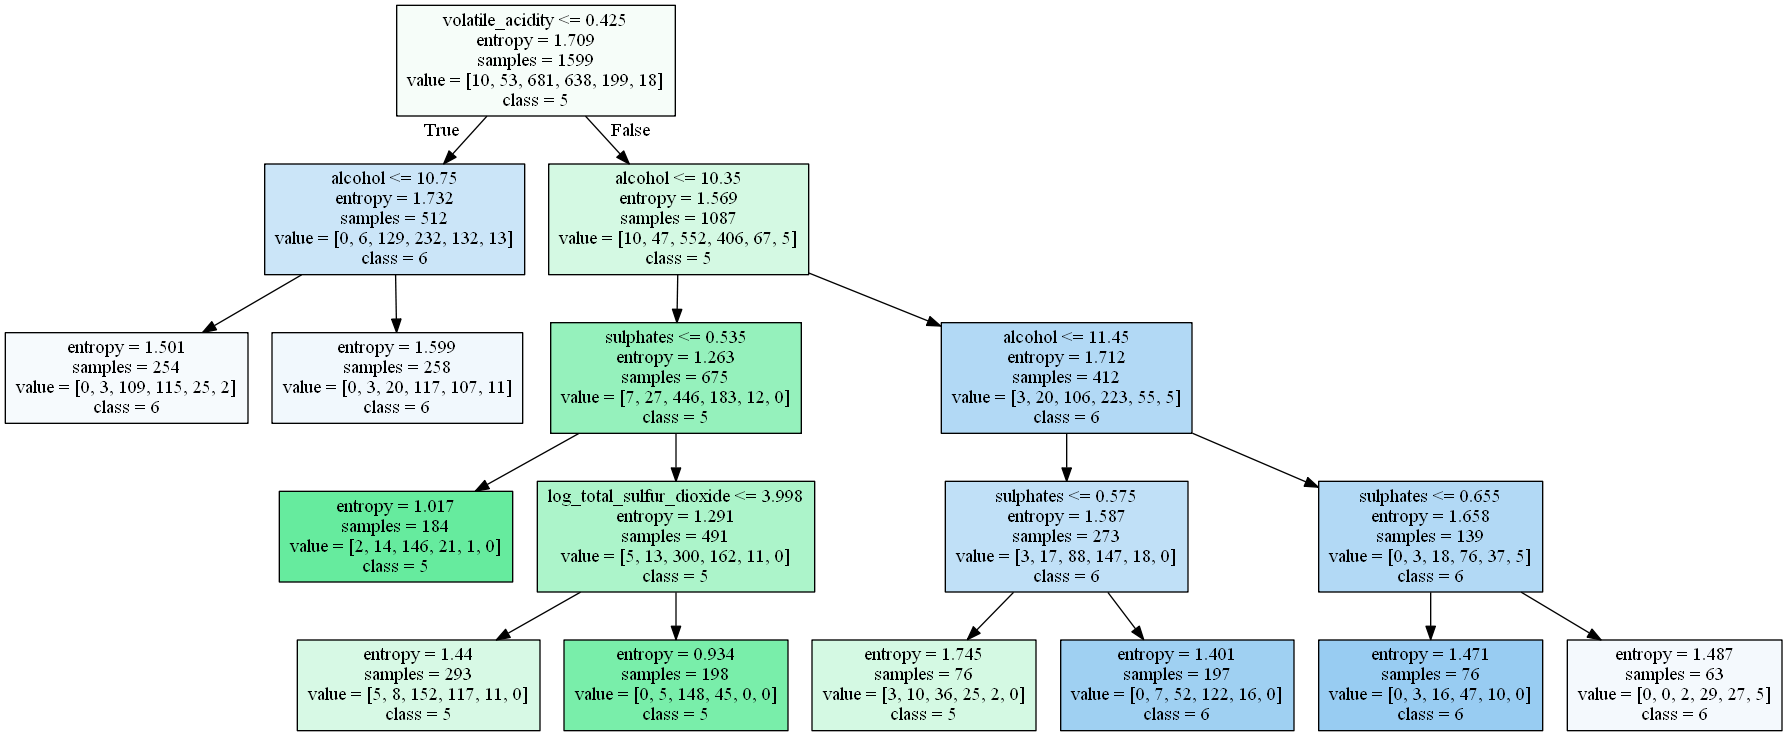

In [47]:
# Tree visualization
from IPython.display import Image
import pydotplus
import graphviz
 
#Rendertree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_selected.columns,
    class_names=['3','4','5','6','7','8'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Trying a similar approach using PCA

In [81]:
from sklearn.preprocessing import StandardScaler

pca = PCA() # create a PCA object
pca.fit(X) # do the math
pca_data = pca.transform(X)

In [82]:
X = wine_qual.drop('quality',1)
Y = wine_qual['quality']  
 
pca = PCA(n_components=4) # create a PCA object  
pca.fit(X) # do the math
pca_data = pca.fit_transform(X)

In [83]:
start_time = time.time() # start timer  

# Initialize and train decision tree.
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features= 'sqrt', max_depth=8,random_state=20)

decision_tree.fit(pca_data, Y)
print(cross_val_score(decision_tree, pca_data, Y, cv=10))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer

[0.53703704 0.52795031 0.49068323 0.45       0.41875    0.35
 0.3875     0.4375     0.42405063 0.39490446]

--- 0.0738523006439209 seconds ---


In [84]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(pca_data, Y).score(pca_data, Y))) 

With 25% Holdout: 0.4925
Testing on Sample: 0.6597873671044403


In [85]:
param_grid = dict(max_depth=range(1,5),max_leaf_nodes=range(2,10),max_features=range(1,5))
grid = GridSearchCV(decision_tree, param_grid, cv=10, scoring="accuracy", return_train_score=True)
grid.fit(X_train, y_train)

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 5), 'max_leaf_nodes': range(2, 10), 'max_features': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [86]:
print(grid.best_params_)
print(grid.best_score_ )

{'max_depth': 4, 'max_features': 3, 'max_leaf_nodes': 9}
0.48874061718098416


In [87]:
start_time = time.time() # start timer  

# Initialize and train decision tree.
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 4, max_features=3, 
                                            max_leaf_nodes=9, random_state=20)

decision_tree.fit(pca_data, Y)
print(cross_val_score(decision_tree, pca_data, Y, cv=10))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer

[0.48148148 0.51552795 0.43478261 0.4625     0.475      0.4375
 0.475      0.4875     0.48734177 0.47133758]

--- 0.06578612327575684 seconds ---


In [88]:
X_train, X_test, y_train, y_test = train_test_split(pca_data, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(pca_data, Y).score(pca_data, Y))) 
y_pred = decision_tree.predict(X_test)


With 25% Holdout: 0.5075
Testing on Sample: 0.5228267667292058


In [89]:
# comfusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   3,   7,   0,   0],
       [  0,   0, 127,  42,   1,   0],
       [  0,   0,  77,  88,   0,   0],
       [  0,   0,  20,  30,   1,   0],
       [  0,   0,   0,   2,   0,   0]], dtype=int64)

In [90]:
# Classification report

from sklearn.metrics import classification_report

target_names = ['3','4','5','6','7','8']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.56      0.75      0.64       170
           6       0.52      0.53      0.53       165
           7       0.50      0.02      0.04        51
           8       0.00      0.00      0.00         2

   micro avg       0.54      0.54      0.54       400
   macro avg       0.26      0.22      0.20       400
weighted avg       0.51      0.54      0.49       400



c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forrest

In [91]:
X = wine_qual.drop(['quality'],1)
X = pd.get_dummies(X)
Y = wine_qual['quality']

In [92]:
start_time = time.time() # start timer
rfc = ensemble.RandomForestClassifier(criterion='entropy',random_state=20, max_features='sqrt', class_weight='balanced') 
rfc.fit(X,Y)

print(cross_val_score(rfc, X, Y, cv=5))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer

c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.53726708 0.47975078 0.5482866  0.51257862 0.54258675]

--- 0.23042893409729004 seconds ---


In [93]:
from sklearn.model_selection import train_test_split
#Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=20)
print('With 25% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X, Y).score(X, Y)))


 

With 25% Holdout: 0.655
Testing on Sample: 0.9843652282676673


In [94]:
# Classification report
y_pred = rfc.predict(X_test)
target_names = ['3','4','5','6','7','8']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        10
           5       0.98      1.00      0.99       170
           6       0.99      0.98      0.98       165
           7       0.98      0.98      0.98        51
           8       1.00      1.00      1.00         2

   micro avg       0.99      0.99      0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [95]:
# plot confusion matrix 
confusion_matrix(y_test,y_pred)

 

array([[  2,   0,   0,   0,   0,   0],
       [  0,  10,   0,   0,   0,   0],
       [  0,   0, 170,   0,   0,   0],
       [  0,   0,   3, 161,   1,   0],
       [  0,   0,   0,   1,  50,   0],
       [  0,   0,   0,   0,   0,   2]], dtype=int64)

In [ ]:
param_grid = dict(max_depth=range(1,5),min_samples_leaf=range(1,3),n_estimators=range(1,10))

In [ ]:
grid = GridSearchCV(rfc, param_grid, cv=10, scoring="accuracy",return_train_score=True)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
start_time = time.time() # start timer
rfc = ensemble.RandomForestClassifier(n_estimators=6 ,min_samples_leaf=2, max_depth = 4,criterion='entropy',random_state=20, max_features='sqrt', class_weight='balanced') 
rfc.fit(X,Y)

print(cross_val_score(rfc, X, Y, cv=5))
print()
print("--- %s seconds ---" % (time.time() - start_time)) # end timer

In [ ]:
print('With 25% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(X, Y).score(X, Y)))



In [ ]:
# A convenience for displaying visualizations.
from IPython.display import Image
import pydotplus
import graphviz
 
# 
# Render our tree.
dot_data = tree.export_graphviz(
    rfc, out_file=None,
    feature_names=X.columns,
    class_names=['3','4','5','6','7','8'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2

predictors = wine_qual.columns.drop('quality')

# Perform feature selection
selector = SelectKBest( f_classif, k=5)
selector.fit(wine_qual[predictors], wine_qual.quality)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())